In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. IMPORTING NECESSARY LIBRARIES & PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**2. READING AND EXPLORING DATA**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/spam email.csv', encoding='latin1')
df.head() # Checking first 5 lines

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail() # Checking last 5 lines

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.info() # Checking Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe() # Checking statistical summary of the dataset / description of dataset

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape # Checking shape of the data

(5572, 2)

In [ ]:
df.columns # Checking column names

Index(['Category', 'Message'], dtype='object')

**3. DATA PREPROCESSING**

In [ ]:
df.isnull().sum() # Checking Null values / Determining the dataset's percentage of missing values / Finding the percentage of Null values in the dataset

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum() # Checking duplicate data

415

In [ ]:
df.drop_duplicates(inplace=True) #Dropping Duplicates
df.duplicated().sum()

0

In [ ]:
df["Category"].value_counts() #Individual count of each category ham and spam

Category
ham     4516
spam     641
Name: count, dtype: int64

In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4516   4516  Go until jurong point, crazy.. Available only ...   
spam         641    641  Free entry in 2 a wkly comp to win FA Cup fina...   

               
         freq  
Category       
ham         1  
spam        1

In [ ]:
df.describe().transpose()

,count,unique,top,freq
Category,5157,2,ham,4516
Message,5157,5157,"Go until jurong point, crazy.. Available only ...",1


In [ ]:
df['length']=df['Message'].apply(len)
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**4. EXPLORATORY DATA ANALYSIS**

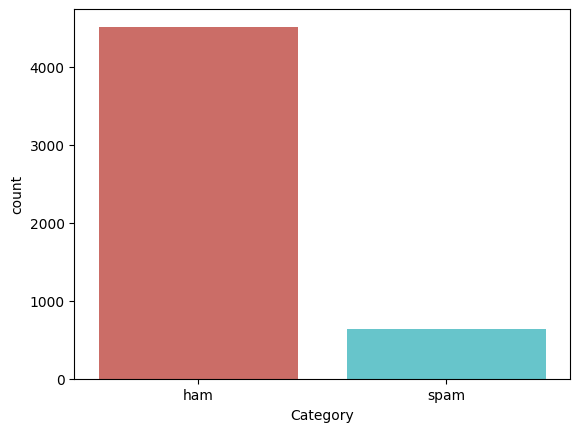

In [ ]:
#1. Distribution of Spam and Ham Emails
sns.countplot(x='Category',data=df,palette='hls')
plt.show()

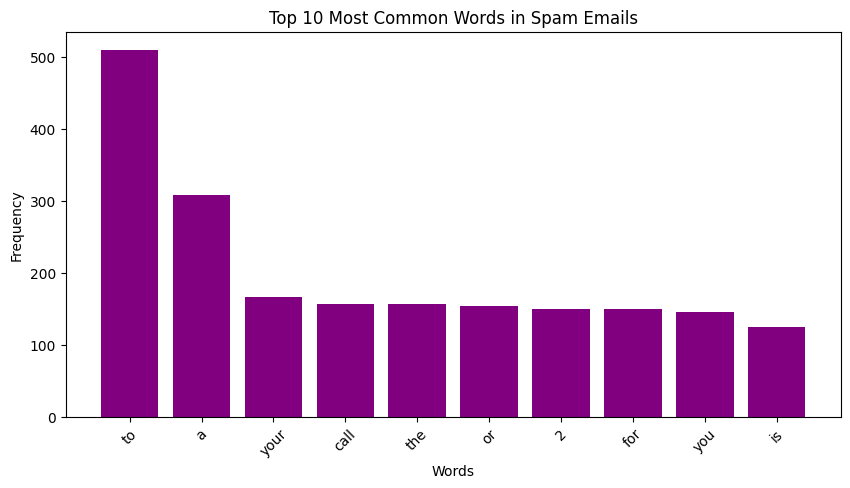

In [ ]:
#2. Top 10 Most Common Words in Spam Emails
spam_words = ' '.join(list(df[df['Category']=='spam']['Message']))
spam_counts = {}
for word in spam_words.split():
    spam_counts[word] = spam_counts.get(word, 0) + 1

common_spam_words = sorted(spam_counts.items(), key=lambda item: item[1], reverse=True)[:10]

x_axis = [word for word, count in common_spam_words]
y_axis = [count for word, count in common_spam_words]


plt.figure(figsize=(10, 5))
plt.bar(x_axis, y_axis, color='purple')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Spam Emails")
plt.xticks(rotation=45)
plt.show()

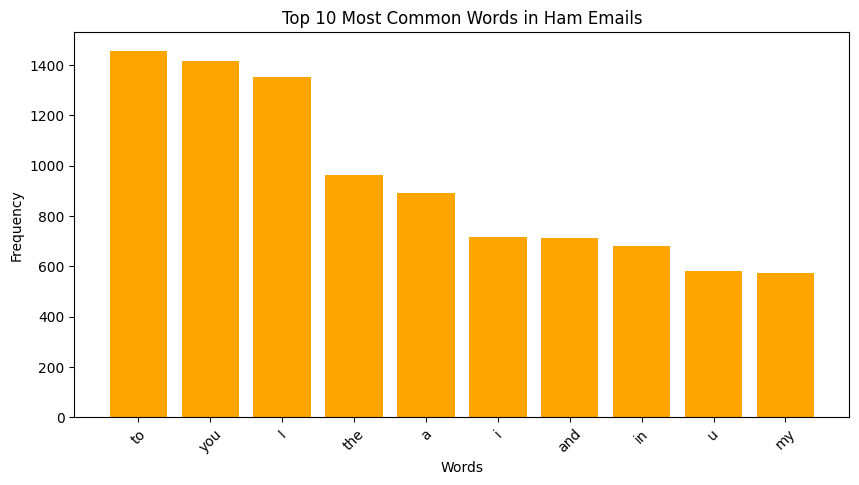

In [ ]:
#3. Top 10 Most Common Words in Ham Emails
ham_words = ' '.join(list(df[df['Category']=='ham']['Message']))
ham_counts = {}
for word in ham_words.split():
    ham_counts[word] = ham_counts.get(word, 0) + 1

common_ham_words = sorted(ham_counts.items(), key=lambda item: item[1], reverse=True)[:10]

x_axis = [word for word, count in common_ham_words]
y_axis = [count for word, count in common_ham_words]


plt.figure(figsize=(10, 5))
plt.bar(x_axis, y_axis, color='orange')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Ham Emails")
plt.xticks(rotation=45)
plt.show()


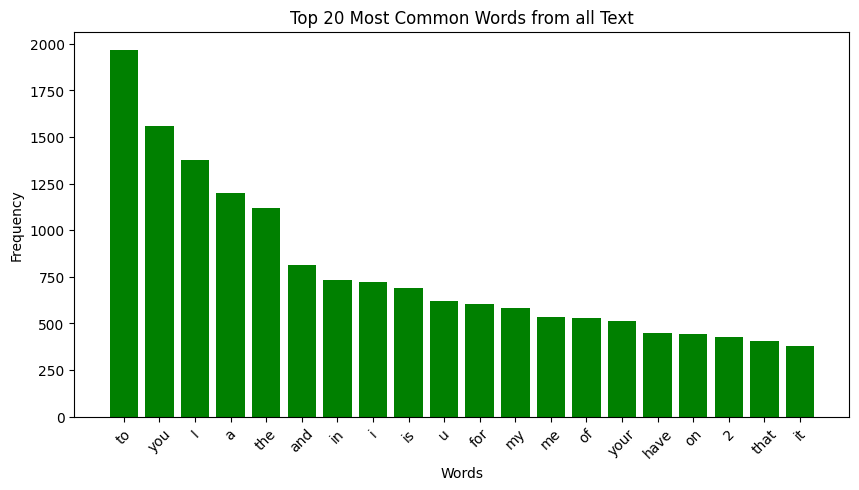

In [ ]:
#4. Top 20 Most Common Words from all Text
all_words = ' '.join(list(df['Message']))
all_counts = {}
for word in all_words.split():
    all_counts[word] = all_counts.get(word, 0) + 1

common_all_words = sorted(all_counts.items(), key=lambda item: item[1], reverse=True)[:20]

x_axis = [word for word, count in common_all_words]
y_axis = [count for word, count in common_all_words]


plt.figure(figsize=(10, 5))
plt.bar(x_axis, y_axis, color='green')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words from all Text")
plt.xticks(rotation=45)
plt.show()


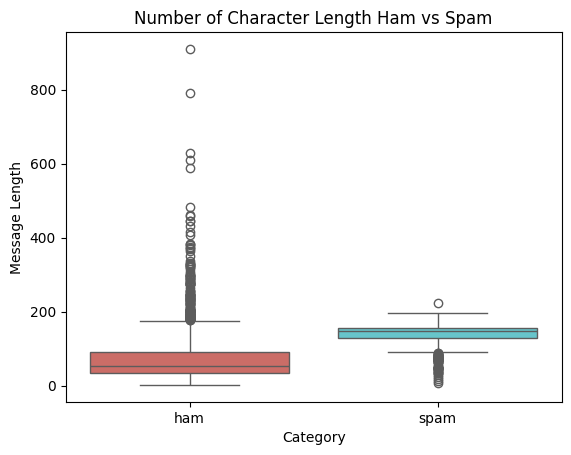

In [ ]:
#5. Number of Character Length Ham vs Spam
df_length = df.groupby('Category')['Message'].apply(lambda x: x.str.len()).reset_index(name='length')
sns.boxplot(x='Category', y='length', data=df_length, palette='hls')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.title('Number of Character Length Ham vs Spam')
plt.show()

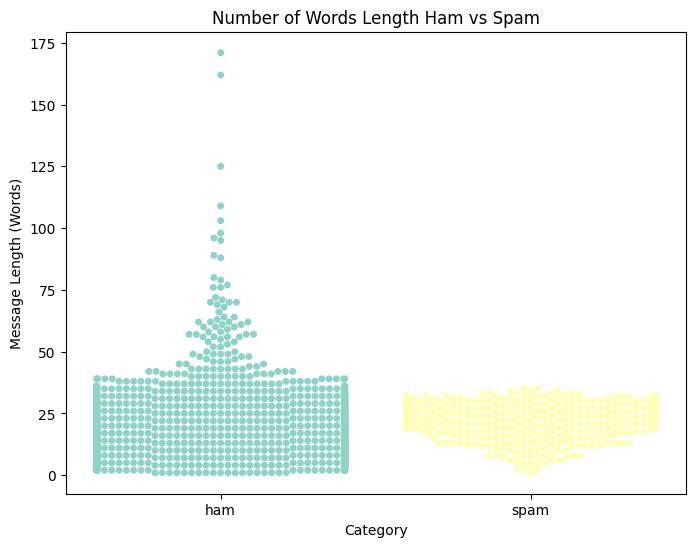

In [ ]:
#6. Number of Words Length Ham vs Spam
df_words = df.groupby('Category')['Message'].apply(lambda x: x.str.split().str.len()).reset_index(name='words')
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Category', y='words', data=df_words, palette='Set3')
plt.xlabel('Category')
plt.ylabel('Message Length (Words)')
plt.title('Number of Words Length Ham vs Spam')
plt.show()

**5. MACHINE LEARNING MODEL SELECTION AND MODEL TRAINING / CHOOSING THE BEST MODELS**

In [ ]:
#A.
# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split

# Importing LogisticRegression, Decision Tree Classifier, Random Forest Classifier, Multinomial Naïve Bayes, KNeighborsClassifier and GradientBoostingClassifier Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Accuracy Score and Confusion Matrix is for Analysis of Models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#B. CountVectorizer, TfidfVectorizer for Bagging of Words and Vectorizing it
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#C. Converting the sparse array to a dense array
X = tfidf.fit_transform(df['Message']).toarray()

In [ ]:
X.shape

(5157, 3000)

In [ ]:
#D.
Y = df['Category'].values

In [ ]:
#E. Splitting the Dataset into Training and Testing Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42)

In [ ]:
#F. Creating the Models / Model Building
# Model 1 - LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

# Model 2 - Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Model 3 - RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)

# Model 4 - Multinomial Naïve Bayes
model4 = MultinomialNB()
model4.fit(X_train, Y_train)

# Model 5 - KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(X_train, Y_train)

# Model 6 - GradientBoostingClassifier
model6 = GradientBoostingClassifier()
model6.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
#G. Prediction
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)
pred6 = model6.predict(X_test)

In [87]:
#H. Testing the Model

# Model 1 - LogisticRegression
print("LogisticRegression")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1)*100)
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2)*100)
print("--------------------------------")

# Model 3 - RandomForestClassifier
print("RandomForestClassifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3)*100)
print("--------------------------------")

# Model 4 - Multinomial Naïve Bayes
print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred4))
print("Accuracy: ", accuracy_score(Y_test, pred4)*100)
print("--------------------------------")

# Model 5 - KNeighborsClassifier
print("KNeighborsClassifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred5))
print("Accuracy: ", accuracy_score(Y_test, pred5)*100)
print("--------------------------------")

# Model 6 - GradientBoostingClassifier
print("GradientBoostingClassifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred6))
print("Accuracy: ", accuracy_score(Y_test, pred6)*100)

LogisticRegression
Confusion Matrix: 
[[894   2]
 [ 30 106]]
Accuracy:  96.89922480620154
--------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[878  18]
 [ 17 119]]
Accuracy:  96.60852713178295
--------------------------------
RandomForestClassifier
Confusion Matrix: 
[[895   1]
 [ 18 118]]
Accuracy:  98.15891472868216
--------------------------------
Multinomial Naïve Bayes
Confusion Matrix: 
[[896   0]
 [ 19 117]]
Accuracy:  98.15891472868216
--------------------------------
KNeighborsClassifier
Confusion Matrix: 
[[896   0]
 [ 90  46]]
Accuracy:  91.27906976744185
--------------------------------
GradientBoostingClassifier
Confusion Matrix: 
[[890   6]
 [ 21 115]]
Accuracy:  97.38372093023256


In [ ]:
#I. Classification Report of all the ML models
from sklearn.metrics import classification_report
report1 = classification_report(Y_test, pred1)
print("Classification Report for LogisticRegression \n", report1)
print("--------------------------------------------------------------")

report2 = classification_report(Y_test, pred2)
print("Classification Report for Decision Tree Classifier \n", report2)
print("--------------------------------------------------------------")

report3 = classification_report(Y_test, pred3)
print("Classification Report for RandomForestClassifier \n", report3)
print("--------------------------------------------------------------")

report4 = classification_report(Y_test, pred4)
print("Classification Report for Multinomial Naïve Bayes \n", report4)
print("-------------------------------------------------------------")

report5 = classification_report(Y_test, pred5)
print("Classification Report for KNeighborsClassifier \n", report5)
print("--------------------------------------------------------------")

report6 = classification_report(Y_test, pred6)
print("Classification Report for GradientBoostingClassifier \n", report6)

Classification Report for LogisticRegression 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       896
        spam       0.98      0.78      0.87       136

    accuracy                           0.97      1032
   macro avg       0.97      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032

--------------------------------------------------------------
Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       896
        spam       0.87      0.88      0.87       136

    accuracy                           0.97      1032
   macro avg       0.92      0.93      0.93      1032
weighted avg       0.97      0.97      0.97      1032

--------------------------------------------------------------
Classification Report for RandomForestClassifier 
               precision    recall  f1-score   support

         ham  

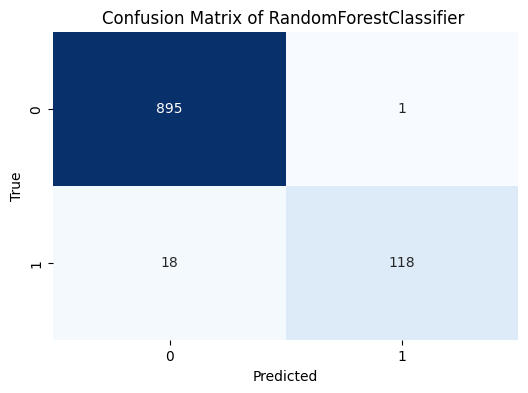

-----------------------------------------------------------------------


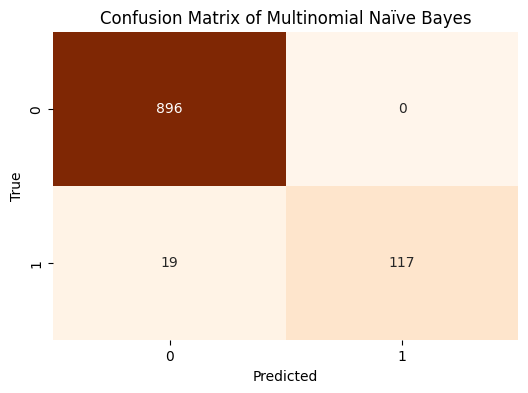

In [ ]:
#J. Confusion Matrix For Model Evaluation of  RandomForestClassifier & Multinomial Naïve Bayes, because both of these model gives highest accuracy of 98.15%
#(1) RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of RandomForestClassifier ')
plt.show()

print("-----------------------------------------------------------------------")

#(2) Multinomial Naïve Bayes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred4)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Multinomial Naïve Bayes')
plt.show()